In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use( 'ggplot' ) 

In [2]:
import pandas 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.cross_validation import cross_val_predict, cross_val_score
import numpy as np 
from scipy.stats import pearsonr

In [3]:
paths = [ 
    '../rosetta_runs/benchmark/feature_set.csv', 
    #'../rosetta_runs/shells/feature_set.csv',
    '../rosetta_runs/ddg_monomer/feature_set.csv', 
    '../foldx_runs/pssm/feature_set.csv', 
    # '../rosetta_runs/homology_models/feature_set.csv', 
]

In [4]:
dat = pandas.read_csv( '../data_sets/experimental/plos_2016.csv', index_col=0 )
dat.kcat = np.log10( dat.kcat / 880 )
dat.km = np.log10( dat.km / 5.5 )
dat.kcatkm = np.log10( dat.kcatkm / 174000 )
dat = dat.replace( [ np.inf, -np.inf ], -5 )

In [5]:
fancy_targets = [ 
    ( 0, 'kcat', r'$k_{\mathrm{cat}}$', 'navy' ), 
    ( 1, 'km', r'$K_{\mathrm{M}}$', 'purple' ), 
    ( 2, 'kcatkm', r'$k_{\mathrm{cat}}/K_{\mathrm{M}}$', 'magenta' ), 
    #( 3, 'tm', '$T_{\mathrm{{m}}$', 'lightblue' ), 
]

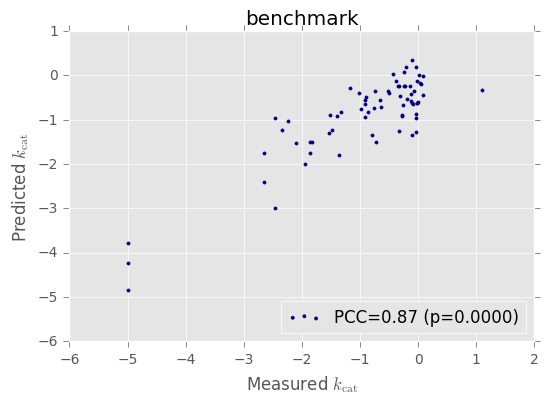

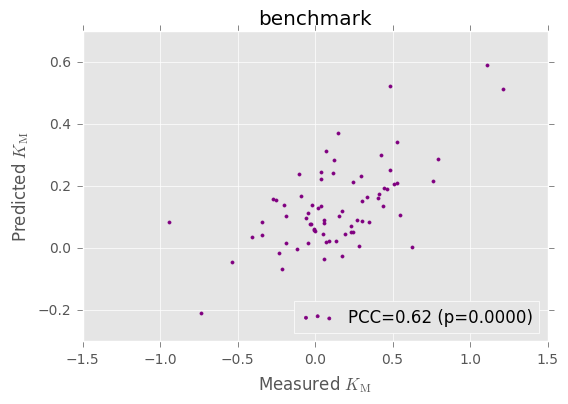

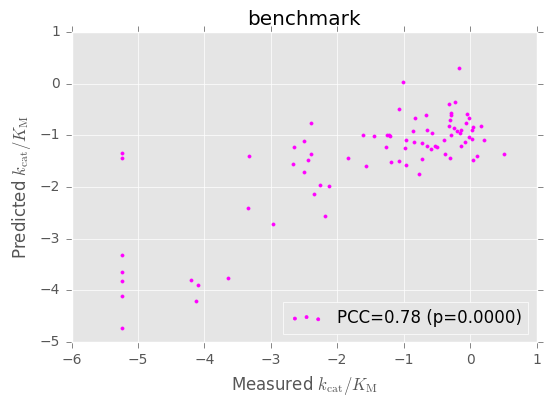

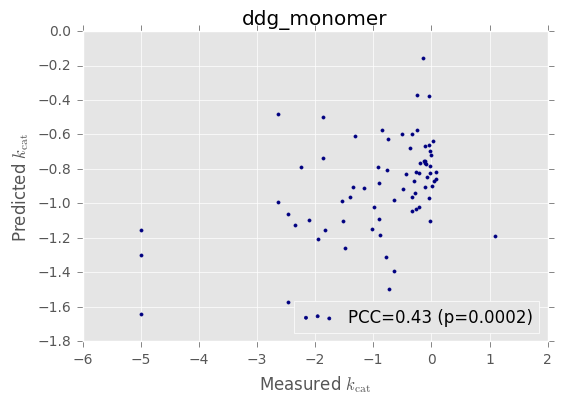

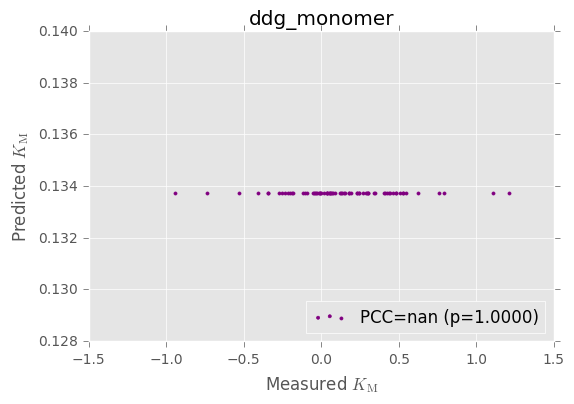

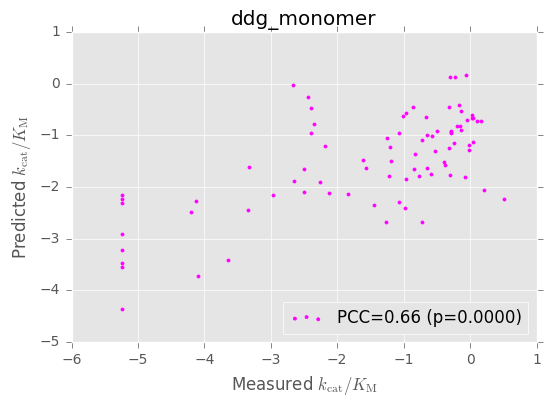

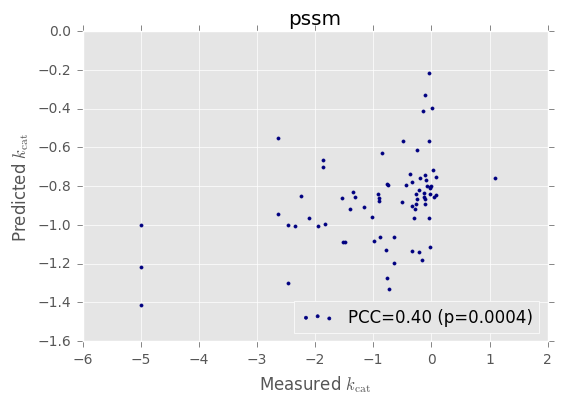

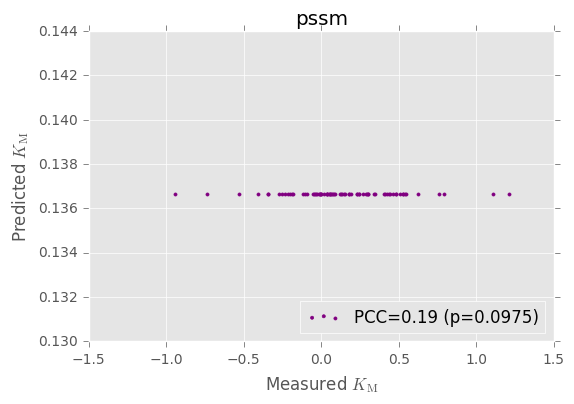

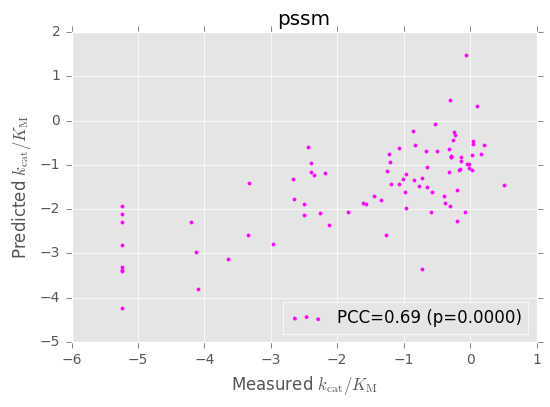

In [8]:
for feature_set in paths:
    feats = pandas.read_csv( feature_set, index_col=0 )
    for index, short_name, fmt_str, color in fancy_targets:
        J = dat[[ short_name ]].join( feats ).dropna()
        scaler = MinMaxScaler()
        X = scaler.fit_transform( J )
        #y = X[ : , 0 ].ravel()
        y = J.ix[ : , 0 ].ravel()
        X = X[ : , 1: ] 
        net = ElasticNetCV( cv=10, max_iter=1e9 )
        net.fit( X, y ) 
        preds = net.predict( X )
        score = pearsonr( preds, y ) 
        plt.scatter( y, preds, marker='.', color=color ) 
        plt.ylabel( 'Predicted ' + fmt_str )
        plt.xlabel( 'Measured ' + fmt_str )
        plt.legend( [ 'PCC={0:.2f} (p={1:.4f})'.format( *score ) ], loc='lower right' )
        plt.title( feature_set.split( '/' )[ 2 ] ) 
        plt.show()